# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level​ - Уровень удовлетворенности работой
2. Last_evaluation ​ - Время с момента последней оценки в годах
3. number_projects​ - Количество проектов, выполненных за время работы
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
5. time_spend_company​ - Стаж работы в компании в годах
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left​ - уволился ли сотрудник
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет
9. department ​ - отдел в котором работает сотрудник
10. salary​ - относительный уровень зарплаты

## Требуется выполнить следующее задание:

### Задание Баллы
1. Загрузите файл HR.csv в pandas dataframe: 5
2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение): 10
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименеескоррелированные переменные: 10
4. Рассчитайте сколько сотрудников работает в каждом департаменте: 5
5. Показать распределение сотрудников по зарплатам: 5
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности: 5
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом: 10
8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности): 10
    Доля сотрудников с повышением за последние 5 лет
    Средняя степень удовлетворенности
    Среднее количество проектов
9. Разделить данные на тестовую и обучающую выборки: 20
    Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
    Оценить качество модели на тестовой выборки
10. Загрузить jupyter notebook с решение на github и прислать ссылку: 5

Итого - максимум 85 баллов
Для зачета необходимо набрать минимум 55

In [1]:
# Import module here
import numpy as np
import matplotlib as mt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats as sts

## Загрузите файл HR.csv в pandas dataframe

In [2]:
# Loading and reading in Pandas
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Рассчитайте основные статистики для переменных

In [32]:
# Average, min, max and others
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Average
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [5]:
# Median
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
# Mode
for column_name in data.columns:
    print(column_name, data[column_name].mode()[0])

satisfaction_level 0.1
last_evaluation 0.55
number_project 4
average_montly_hours 135
time_spend_company 3
Work_accident 0
left 0
promotion_last_5years 0
department sales
salary low


In [7]:
# Min
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
department                 IT
salary                   high
dtype: object

In [8]:
# Max
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
department               technical
salary                      medium
dtype: object

In [9]:
# Average distortion
data.satisfaction_level.std()

0.2486306510611418

In [10]:
np.std(data.satisfaction_level)

0.24862236268207252

## Рассчитайте и визуализировать корреляционную матрицу

In [46]:
# Corellation matrix
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  qty                    14999 non-null  int64  
 11  class_left             14999 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


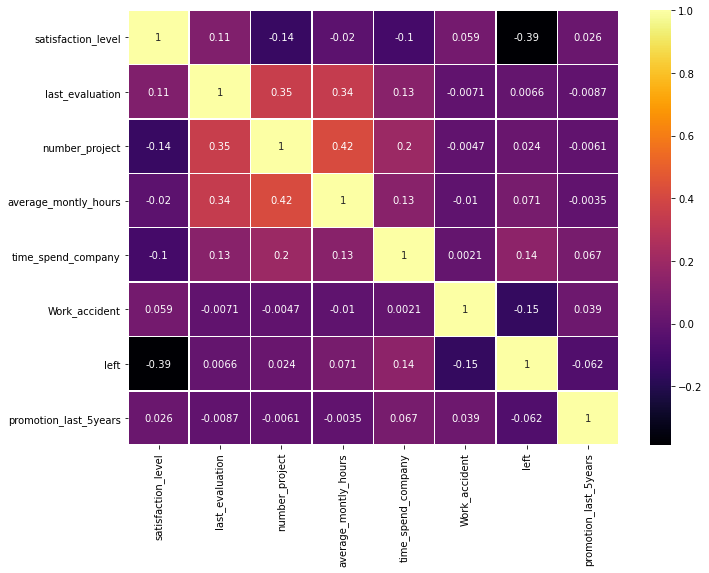

In [13]:
sns.heatmap(data.corr(),annot = True, cmap = 'inferno', linewidths = 0.5)
fig = plt.gcf()
fig.set_size_inches(11,8)
plt.show()

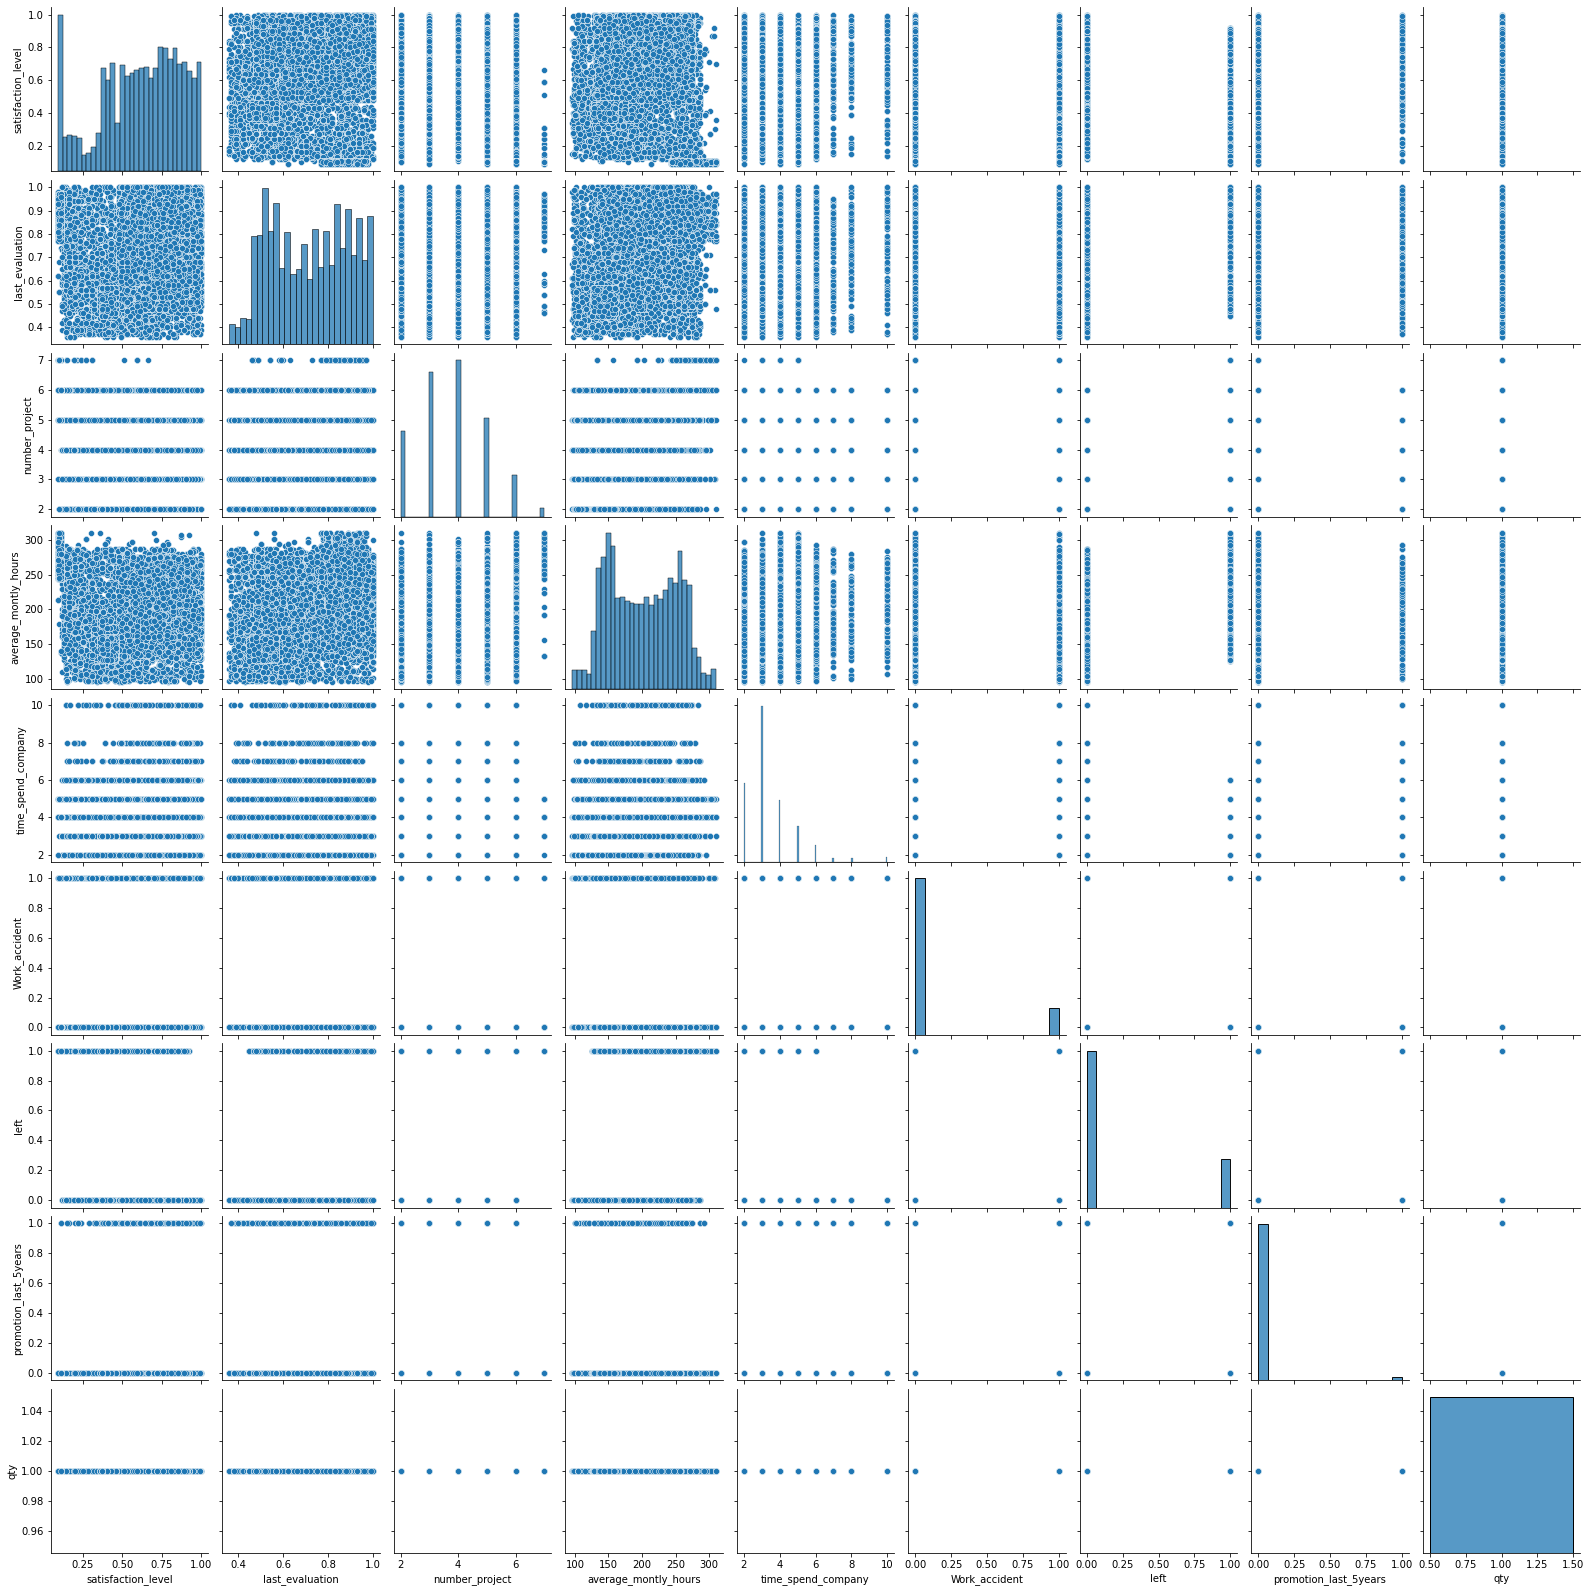

In [41]:
# Most corellated
sns.pairplot(data)

## Натбольшая кореляция
Мы видим кореляцию мкжду средним количеством рабочих часов и количеством проектов, чем больше проектов, тем больше часов на работе тратил сотрудник.
Так же, есть взаимосвязь между оценкой сотрудника и количеством проектоы и затраченного на работу времени.


## Наименьшая кореляция
Наименее выраженной является связь между уровнем удовлетронённости сотрудника и его последующим увольнением из компании. Отдельно можно сказать о слабой свзяи мкжду увольнением из компании и инцидентами на рабочем месте.

## Рассчитайте сколько сотрудников работает в каждом департаменте

In [33]:
# Employee count per department
data['qty'] = 1
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,qty
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [37]:
data_dept = data.groupby('department').count()[['qty']].reset_index()
data_dept

,department,qty
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


## Показать распределение сотрудников по зарплатам

In [38]:
# Salary sort total
data_salary = data.groupby('salary').count()[['qty']].reset_index()
data_salary

,salary,qty
0,high,1237
1,low,7316
2,medium,6446


## Показать распределение сотрудников по зарплатам по департаментам 

In [40]:
# Salary per department
dept_salary = data.groupby(['department','salary']).count()[['qty']].reset_index()
dept_salary

,department,salary,qty
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


## Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [47]:
# Salary and time

# Class creation for calculation
def class_left(param):
    if param == 0:
        return "no"
    elif param == 1:
        return "yes"

In [48]:
left_emp = data[data['class_left'] == "yes"]['average_montly_hours']
present_emp = data[data['class_left'] == "no"]['average_montly_hours']

In [49]:
data['class_left'] = data['left'].apply(class_left)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,qty,class_left
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,yes
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1,yes
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1,yes
3,0.72,0.87,5,223,5,0,1,0,sales,low,1,yes
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,yes


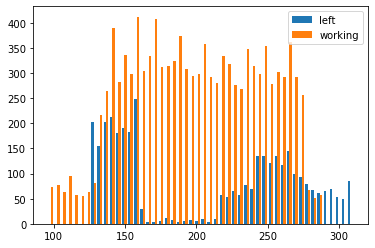

In [69]:
plt.hist([left_emp, present_emp],bins = 50, label=['left', 'working'])
plt.legend()
plt.show()

In [71]:
low_salary = data.loc[data['salary'] == 'low']
high_salary = data.loc[data['salary'] == 'high']

In [72]:
result = st.ttest_ind(low_salary['average_montly_hours'], high_salary['average_montly_hours'], equal_var = False)
print(result)

Ttest_indResult(statistic=0.7624331665385475, pvalue=0.4459045542257889)


P-value меньше 0.5, это говорит о том, что нет чёткой взаимосвязи между с высоким окладом, проводят на работе больще времени, чем люди с меньшим окладом.

## Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников

In [89]:
# Prep data for counting
lefted = data.loc[data['left'] == 1]
stayed = data.loc[data['left'] == 0]
promoted = lefted.loc[lefted['promotion_last_5years'] == 1].count()[0]
promoted_stay = stayed.loc[stayed['promotion_last_5years'] == 1].count()[0]

In [90]:
# Повышение за последние пять лет среди уволившихся
five_years = promoted/lefted.count()[0]*100
five_years

0.5320638476617194

In [91]:
# Повышение за последние пять лет среди оставшихся
five_years = promoted_stay/stayed.count()[0]*100
five_years

2.6251312565628284

In [86]:
# Средняя удовлетворённость среди уволившихся
satisfacted = lefted['satisfaction_level'].mean()
satisfacted

0.44009801176140917

In [92]:
# Средняя удовлетворённость среди оставшихся
satisfacted = stayed['satisfaction_level'].mean()
satisfacted

0.666809590479516

In [93]:
# Среднее количество проектов среди уволившихся
avg_projects = stayed['number_project'].mean()
avg_projects

3.786664333216661

## LDA

In [7]:
# Main setup
data_train, data_test = train_test_split(data, test_size = 0.1)

# Delete Salary and Department setup
#data_train = data.drop(['department','salary'], axis=1)
#data_test = data.drop(['department','salary'], axis=1)
del data_train['department']
del data_test['department']
del data_train['salary']
del data_test['salary']

In [8]:
y_train, y_test = data_train['left'], data_test['left']
lda = LinearDiscriminantAnalysis()

In [9]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
lda.predict(data_test)

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T
result

,0,1
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1495,0,0
1496,0,0
1497,1,0
1498,1,0


In [12]:
accuracy_score(y_test, lda.predict(data_test))

0.752

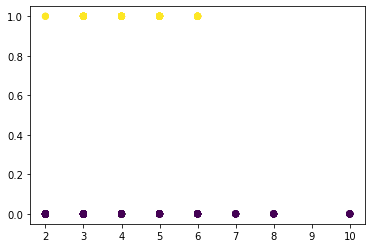

In [26]:
plt.scatter(data_test['time_spend_company'], data_test['left'], c = y_test)
plt.show()

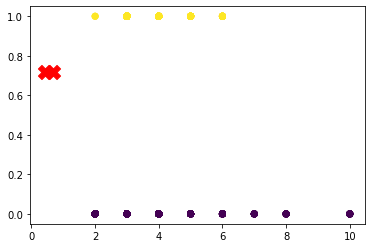

In [27]:
plt.scatter(data_test['time_spend_company'], data_test['left'], c = y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=200, marker='X')
plt.show()